# Übung 09

Ein Biometrisches System zur Zugangskontrolle hat folgende Eckdaten: Das System erkennt eine berechtigte Person in 95 von 100 Fällen richtig, allerdings wird eine unberechtigte Person in 1 von 100 Fällen trotzdem durchgelassen. Das System soll in einer Firma mit 500 Mitarbeitern verwendet werden um den Zugang zum Serverraum zu überwachen, in den nur 3 Personen eintreten dürfen. Wie groß ist die Wahrscheinlichkeit dass eine durchgelassene Person auch Zutrittsberechtigt ist?

Dieses Beispiel soll wieder auf zwei Arten berechnet werden. Die händische Variante haben im Vorgängerkurs bereits besprochen. Die Pythonimplementation soll nicht genau die händische Berechnung implementieren sondern mit Hilfe von zwei Funktionen simuliert werden. Ich schlage vor diese "personBerechtigt" und "personDurchgelassen" zu nennen.

Hinweise:
1. "personBerechtigt" soll unter der Verwendung der schon bekannten uniform Funktion als Ergebnis nur zurückliefern ob eine Person berechtigt ist oder nicht.
2. Ich würde dann ein leeres Array initialisieren und mit Hilfe von append das Ergebnis von "personBerechtigt" befüllen.
3. Für jede Person in dem nun befüllten Array ist es danach notwendig zu evaluieren ob die Personen auch tatsächlich durchgelassen wurde. Da hilft die Funktion "personDurchgelassen", welche sich wieder uniform und eine if-Abfrage zu Nutzen machen kann, um zu simulieren ob eine Personen durchgelassen wurde oder nicht.
4. Abschließend gilt es noch diejenigen Personen zu finden die sowohl berechtigt waren und auch durchgelassen wurden. Deren Anzahl gilt es jenen gegenüberzustellen, die überhaupt durchgelassen worden sind.

A ... Person berechtigt und durchgelassen

B ... Person durchgelassen

# Übung 14

Verwende das Beispiel vom Biometrischen Zugangssystem und berechne ein 99% KI. Wie viele Zutrittsversuche sind notwendig um zu beurteilen ob die Genauigkeit des KIs bei 2% liegt? Bestimme die Anzahl der Simulationen die für eine adäquate Genauigkeit notwendig sind und visualisiere das KI in Abhängigkeit von den Zutrittsversuchen.

(5.722791899899499, 8.6772081001005)
(5.724294396430922, 8.875705603569077)
(6.829368682541187, 8.83729798412548)
(6.326611443493156, 8.773388556506845)
(7.18227651392944, 9.297723486070561)
(7.155860838174402, 8.504139161825597)
(7.6694909743065445, 8.680509025693457)
(7.376199028938148, 8.15046763772852)
(7.476993980782962, 8.203006019217039)
(7.595204260666285, 8.248795739333714)


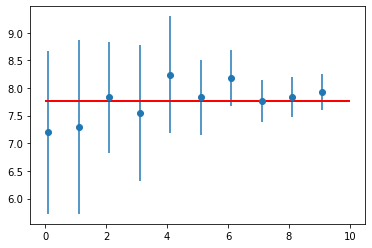

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

rng = np.random.default_rng()
n = 15000

class Person:
    def __init__(self, berechtigt, durchgelassen):
        self.berechtigt = berechtigt
        self.durchgelassen = durchgelassen

def find_items(lst, condition):
    return [elem for i, elem in enumerate(lst) if condition(elem)]        

def personBerechtigt():
    return rng.uniform(low=0, high=1, size=1) <= (3/500)
    
def personDurchgelassen(istBerechtigt):
    if istBerechtigt:
        return rng.uniform(low=0, high=1, size=1) <= (95/100)
    
    return rng.uniform(low=0, high=1, size=1) <= (1/100)

def createSim(n_pers, n_sim):
    p_list = []
    for i in range(0, n_sim):
        persons = list()
        for x in range(0, n_pers):
            istBerechtigt = personBerechtigt()
            durchgelassen = personDurchgelassen(istBerechtigt)
            persons.append( Person(istBerechtigt, durchgelassen) )

        countA = len(find_items(persons, lambda e: e.berechtigt == True and e.durchgelassen == True))
        countB = len(find_items(persons, lambda e: e.durchgelassen == True))

       
        p_list.append(countB)
    return p_list

n_person = 500

n_sims = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500]
p_means = []
KIs = []
for i in range(0, len(n_sims)):
    sim = createSim(n_person, n_sims[i])
    p_means.append(np.average(sim))
    interval = stats.norm.interval(0.99, loc=p_means[i], scale=stats.sem(sim))
    KIs.append(interval)

for i in range(0, len(KIs)):
    print(KIs[i])

plt.errorbar(x=np.arange(0.1, len(n_sims), 1), 
             y=p_means, 
             yerr=[(top-bot)/2 for top,bot in KIs],
             fmt='o')

plt.hlines(xmin=0, xmax=10,
           y=np.average(p_means), 
           linewidth=2.0,
           color="red");